In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


## Import python modules

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import gc

## Read training data

In [3]:
train = pd.read_feather('../input/amexfeather/train_data.ftr')
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [4]:
train =  (train.groupby('customer_ID').tail(1).sort_index())

<AxesSubplot:xlabel='target', ylabel='count'>

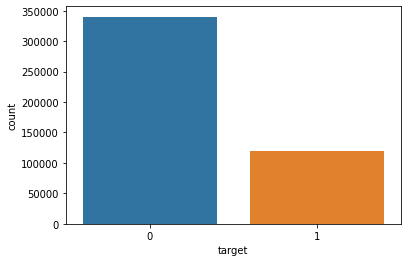

In [5]:
sns.countplot(x = 'target', data = train)

## Feature engineering 

### Remove features

In [6]:
train.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458913 entries, 12 to 5531450
Data columns (total 191 columns):
 #    Column       Non-Null Count   Dtype         
---   ------       --------------   -----         
 0    customer_ID  458913 non-null  object        
 1    S_2          458913 non-null  datetime64[ns]
 2    P_2          455944 non-null  float16       
 3    D_39         458913 non-null  float16       
 4    B_1          458913 non-null  float16       
 5    B_2          458882 non-null  float16       
 6    R_1          458913 non-null  float16       
 7    S_3          373943 non-null  float16       
 8    D_41         458882 non-null  float16       
 9    B_3          458882 non-null  float16       
 10   D_42         59910 non-null   float16       
 11   D_43         324591 non-null  float16       
 12   D_44         436618 non-null  float16       
 13   B_4          458913 non-null  float16       
 14   D_45         458882 non-null  float16       
 15   B_5          

In [7]:
arr = [] # Array contains columns that have more than 200,000 null values 
for i in train.columns:
    na_sum = train[i].isna().sum()
    if(na_sum > 200000): arr.append(i)
    print(i, ": ",na_sum)
print(arr)

customer_ID :  0
S_2 :  0
P_2 :  2969
D_39 :  0
B_1 :  0
B_2 :  31
R_1 :  0
S_3 :  84970
D_41 :  31
B_3 :  31
D_42 :  399003
D_43 :  134322
D_44 :  22295
B_4 :  0
D_45 :  31
B_5 :  0
R_2 :  0
D_46 :  95123
D_47 :  0
D_48 :  57992
D_49 :  407150
B_6 :  40
B_7 :  0
B_8 :  4091
D_50 :  262235
D_51 :  0
B_9 :  0
R_3 :  0
D_52 :  1240
P_3 :  22220
B_10 :  0
D_53 :  325932
S_5 :  0
B_11 :  0
S_6 :  0
D_54 :  31
R_4 :  0
S_7 :  84970
B_12 :  0
S_8 :  0
D_55 :  30377
D_56 :  244734
B_13 :  1563
R_5 :  0
D_58 :  0
S_9 :  183858
B_14 :  0
D_59 :  4086
D_60 :  0
D_61 :  48348
B_15 :  612
S_11 :  0
D_62 :  58953
D_63 :  0
D_64 :  0
D_65 :  0
B_16 :  31
B_17 :  244471
B_18 :  0
B_19 :  31
D_66 :  406331
B_20 :  31
D_68 :  9012
S_12 :  0
R_6 :  0
S_13 :  0
B_21 :  0
D_69 :  6365
B_22 :  31
D_70 :  4196
D_71 :  0
D_72 :  1216
S_15 :  0
B_23 :  0
D_73 :  454674
P_4 :  0
D_74 :  1701
D_75 :  0
D_76 :  409597
B_24 :  0
R_7 :  0
D_77 :  213837
B_25 :  612
B_26 :  31
D_78 :  22295
D_79 :  2795
R_8 :  0
R_

In [8]:
# Remove date column
train = train.drop(['S_2'], axis='columns')
# Remove columns with more than 20,000 null values
train = train.drop(arr, axis=1)

In [9]:
gc.collect()

56

In [10]:
cols = train.columns.to_list()
category_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']
numerical_cols = [col for col in cols if col not in category_cols + ['target']]

In [11]:
X = train[category_cols + numerical_cols]
y = train['target']

X.shape, y.shape

((458913, 159), (458913,))

In [12]:
X_cid = X['customer_ID'] 
X = X.drop(columns=['customer_ID'],axis=1)
numerical_cols.remove('customer_ID')

### Categorical encoding

In [13]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X[category_cols] = enc.fit_transform(X[category_cols])
gc.collect()

92

### Feature scaling

In [14]:
sc= StandardScaler()
X[numerical_cols] = sc.fit_transform(X[numerical_cols])

### Handle missing value

In [15]:
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [16]:
np.all(np.isfinite(X))

True

In [17]:
np.any(np.isnan(X))

False

### Pricipal Component Analysis 

In [18]:
pca = PCA()
comp = pca.fit(X)

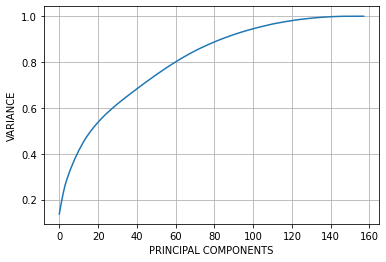

In [19]:
plt.plot(np.cumsum(comp.explained_variance_ratio_))
plt.grid(axis="both")
plt.xlabel("PRINCIPAL COMPONENTS")
plt.ylabel("VARIANCE")
plt.show()

In [20]:
pca_n = PCA(n_components=125)
X_new = pca_n.fit_transform(X)
X_new.shape

(458913, 125)

## Split the dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,stratify=y,test_size=0.15, random_state=10)

## Support Vector Machine

In [52]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

In [23]:
# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild
print(y_pred)

[0 0 1 ... 0 0 1]


In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8657698621380944


## Test data

In [24]:
test = pd.read_feather('../input/amexfeather/test_data.ftr')
test.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631348,0.001912,0.010727,0.814453,0.007545,0.168701,0.009972,0.002348,...,NaN,NaN,NaN,NaN,0.004669,NaN,NaN,NaN,0.008278,NaN
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.586914,0.005276,0.011024,0.811035,0.001817,0.241333,0.000166,0.009132,...,NaN,NaN,NaN,0.000142,0.004940,0.009018,NaN,0.003695,0.003754,0.001460
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.608887,0.003326,0.016388,1.004883,0.000114,0.267090,0.004196,0.004192,...,NaN,NaN,NaN,0.000074,0.002113,0.004658,NaN,0.003155,0.002155,0.006481
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614746,0.009064,0.021667,0.816406,0.009720,0.188965,0.004124,0.015327,...,NaN,NaN,NaN,0.004742,0.006393,0.002890,NaN,0.006042,0.005207,0.007858
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591797,0.238770,0.015930,0.810547,0.002026,0.180054,0.000731,0.011284,...,NaN,NaN,NaN,0.008133,0.004330,0.008385,NaN,0.001008,0.007420,0.009468


In [42]:
test.shape

(924621, 158)

In [25]:
test =  (
    test
    .groupby('customer_ID')
    .tail(1)
    .sort_index()
    .drop(['S_2'], axis='columns')
)


In [26]:
test[category_cols] = enc.transform(test[category_cols])
gc.collect()

3251

In [27]:
# Remove columns with less data
test = test.drop(columns=['customer_ID'],axis=1)
test = test.drop(arr, axis=1)

In [28]:
test[numerical_cols] = sc.fit_transform(test[numerical_cols])

In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(test)
test = imputer.transform(test)

In [30]:
test_new = pca_n.fit_transform(test)
test_new.shape

(924621, 125)

In [31]:
gc.collect()

115

In [32]:
#Predict Output
predicted= model.predict(test_new) 

In [33]:
gc.collect()

103

In [34]:
predicted

array([0, 0, 0, ..., 0, 1, 0])

In [40]:
len(predicted)

924621

## Save predicted values

In [35]:
test1 = pd.read_feather('../input/amexfeather/test_data.ftr')

In [43]:
test1.shape

(11363762, 190)

In [47]:
test1 =  (
    test1
    .groupby('customer_ID')
    .tail(1)
    .sort_index()
    .drop(['S_2'], axis='columns')
)

In [45]:
sample = pd.read_csv('../input/amex-default-prediction/sample_submission.csv')


In [46]:
sample.shape

(924621, 2)

In [48]:
output = pd.DataFrame({'customer_ID': test1.customer_ID, 'prediction': predicted})

In [49]:
output.to_csv('submission.csv',index=False)